# Natural language processing

## Import Dataset and go through Data

In [1]:
import zipfile

def unzip_data(filename):
    zip_ref = zipfile.ZipFile(filename, "r")
    zip_ref.extractall()
    zip_ref.close()

In [2]:
unzip_data("nlp_getting_started.zip")

In [9]:
# Now, let's see what is inside the dataset
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [10]:
walk_through_dir('nlp_getting_started')

In [11]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
# Here, we can see that trained data is not shuffled
shuffled_train = train.sample(frac = 1 , random_state = 42)
shuffled_train.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [13]:
# Here, we can see that label in data is target
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [14]:
import random
random_index = random.randint(0 , len(train) - 5)

for row in shuffled_train[['text' , 'target']][random_index:random_index+5].itertuples():
    index , text , target = row
    print(f'{index} Target: {target}     ' , '(Real Disaster)' if(target > 0) else '(Normal)')
    print(f'Text: {text}')
    print('---\n')

201 Target: 1      (Real Disaster)
Text: http://t.co/FueRk0gWui Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/Mv7GgGlmVc
---

1332 Target: 0      (Normal)
Text: I'm mentally preparing myself for a bomb ass school year if it's not I'm burning buildings ??
---

3502 Target: 1      (Real Disaster)
Text: You Are Invited to The Expo Explosion Summer Event 2015! 
WHEN: August 14th Friday 2015
WHERE: Ben E Keith... http://t.co/yh4R7Ug21a
---

2708 Target: 0      (Normal)
Text: Ignition Knock (Detonation) Sensor Connector-Connecto Dorman 917-141 http://t.co/rfJZexQgxt http://t.co/WQGsmiOiMx
---

6030 Target: 1      (Real Disaster)
Text: [Report 5] 18:22:45 Ibaraki Prefecture offing M5.5 Depth 60km Maximum seismic intensity 4 #Earthquake
---



## Split data into training and testing part

In [15]:
from sklearn.model_selection import train_test_split

# Here, we have to use to_numpy function because we know that tensorflow can only handle numpy array
# If we don't convert data in to numpy then it stays in a format of series
# And that will show error while we start to process on data
train_data , val_data , train_label , val_label = train_test_split(shuffled_train['text'].to_numpy() , shuffled_train['target'].to_numpy() , 
                                                                  test_size = 0.1 , random_state = 42)

In [16]:
len(train_data) , len(val_data) , len(train_label) , len(val_label)

(6851, 762, 6851, 762)

In [17]:
train_data[:10], train_label[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Convert data from String to Integer

In [18]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorise = TextVectorization(max_tokens = None , standardize = 'lower_and_strip_punctuation' , 
                                  split = 'whitespace' , ngrams = None , output_mode = 'int' , 
                                  output_sequence_length = None , pad_to_max_tokens = True)

In [19]:
round(sum([len(i.split()) for i in train_data]) / len(train_data))

15

In [20]:
# Fit the text vectorizer to the training text
text_vectorise.adapt(train_data)

In [21]:
# Now, our model is trained  let's give it a sample and see the output
text_vectorise(['My name is Tirth' , 'And I am the biggest fan of Iron-man. He is an big brain and heart of Avenger'])

<tf.Tensor: shape=(2, 17), dtype=int64, numpy=
array([[  13,  735,    9,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   7,    8,  160,    2, 1038,  627,    6,    1,   56,    9,   39,
         335, 1890,    7,  435,    6,    1]], dtype=int64)>

In [22]:
text_vectorise(['My name is Tirth'])

<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[ 13, 735,   9,   1]], dtype=int64)>

In the given data we can see that length of tensor varies on different inputs.

So, we need to build the model such that it can work on every data and give same length of output

In [23]:
# Let's define new text_vectorise
# We have set this value which is average of number of words in review
text_vectorise = TextVectorization(max_tokens = 10000 , output_mode = 'int' , output_sequence_length = 15)

In [24]:
text_vectorise.adapt(train_data)

In [25]:
text_vectorise(['My name is Tirth' , 'And I am the biggest fan of Iron-man. He is an big brain and heart of Avenger'])

<tf.Tensor: shape=(2, 15), dtype=int64, numpy=
array([[  13,  735,    9,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   7,    8,  160,    2, 1038,  627,    6,    1,   56,    9,   39,
         335, 1890,    7,  435]], dtype=int64)>

We can see by this method we have ignored some of the words

In [26]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorise.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [27]:
embedding = tf.keras.layers.Embedding(input_dim = 10000 , output_dim = 128 , embeddings_initializer = "uniform",
                                     input_length = 15)

In [28]:
random_sentence = random.choice(train_data)

print(f'Original Text: \n {random_sentence} \n \n Embedded Text: ')

sample_embed = embedding(text_vectorise([random_sentence]))
print(sample_embed)

Original Text: 
 1st wk of Rainier Diet and my street Seward Park Ave is inundated w/ bypass traffic so @seattledot what's your plan? @seattletimes 
 
 Embedded Text: 
tf.Tensor(
[[[-0.02626486  0.02489677  0.01112913 ...  0.01352126  0.00101148
    0.01081574]
  [-0.04609059  0.0134044  -0.01486454 ... -0.00441498 -0.00672521
    0.0460559 ]
  [ 0.00816593 -0.01125602 -0.04205699 ...  0.04109145 -0.0233161
    0.04142242]
  ...
  [ 0.01142497 -0.04072481 -0.04593381 ...  0.04848829 -0.01705253
    0.01958149]
  [-0.00746336 -0.01148746 -0.03377707 ...  0.04567236  0.01540879
   -0.03558017]
  [ 0.02687624  0.03552241 -0.04281583 ... -0.02507528  0.01344143
   -0.02094606]]], shape=(1, 15, 128), dtype=float32)


In [29]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.02626486,  0.02489677,  0.01112913,  0.04187724,  0.04481247,
       -0.0315122 ,  0.00878147, -0.01818307,  0.0492834 , -0.04160342,
        0.00922357, -0.04125585,  0.00357901, -0.00918447,  0.00894312,
       -0.01784341,  0.04365095,  0.02043324,  0.02753371,  0.02760328,
        0.04119718, -0.01553487, -0.03304504,  0.04865879, -0.01335103,
       -0.01705796,  0.03163668, -0.04309852, -0.00607691, -0.00525808,
        0.03532673,  0.00556356, -0.03641491, -0.04626456,  0.00484885,
        0.01985443,  0.03395336, -0.04723645, -0.00286195, -0.03695991,
        0.01543332,  0.04720925, -0.04681224,  0.03206268,  0.04159439,
        0.01647521, -0.02344722,  0.04380963, -0.01581519,  0.01042588,
       -0.04905113,  0.04316131,  0.04988131,  0.02364052,  0.02025026,
       -0.01603211, -0.04640582, -0.04577739, -0.04101448, -0.03161969,
        0.00577699,  0.01080605,  0.04795852, -0.01462637, -0.00328917,
       -0.008732

## Getting baseline(by naive_bayes model)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_data, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [31]:
baseline_score = model_0.score(val_data, val_label)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [32]:
# Make predictions
baseline_preds = model_0.predict(val_data)
print(baseline_preds[:20])
print(val_label[:20])

[1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1]
[0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0]


In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_result(y_true , y_pred):
    model_accuracy = accuracy_score(y_pred , y_true)
    
    model_precision , model_recall , model_f1 , _ = precision_recall_fscore_support(y_true , y_pred , average = 'weighted')
    model_results = {'Accuracy' : model_accuracy , 
                    'Precision' : model_precision , 
                    'Recall' : model_recall , 
                    'F1 Score' : model_f1}
    
    return model_results

In [34]:
baseline_results = calculate_result(val_label , baseline_preds)
print(baseline_results)

{'Accuracy': 0.7926509186351706, 'Precision': 0.8111390004213173, 'Recall': 0.7926509186351706, 'F1 Score': 0.7862189758049549}


In [35]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

  # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

  # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [36]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir
    )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

## Model - 1 (Start with basic model)

In [37]:
# Now let's built model with neural network

inputs = tf.keras.layers.Input(shape = (1 , ) , dtype = 'string')
x = text_vectorise(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1 , activation = 'sigmoid')(x)

model_1 = tf.keras.Model(inputs ,outputs , name = 'Model_1_Dense')

In [38]:
model_1.compile(loss = 'binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [39]:
model_1.summary()

Model: "Model_1_Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [40]:
history_1 = model_1.fit(train_data , train_label , epochs = 5 , validation_data = (val_data , val_label) , 
                       callbacks = [create_tensorboard_callback('NLP' , 'Simple_Dense_Model')])

Saving TensorBoard log files to: NLP/Simple_Dense_Model/20210707-121907
Epoch 1/5
215/215 [==============================] - 9s 35ms/step - loss: 0.6084 - accuracy: 0.7000 - val_loss: 0.5344 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 7s 34ms/step - loss: 0.4396 - accuracy: 0.8213 - val_loss: 0.4678 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 7s 33ms/step - loss: 0.3450 - accuracy: 0.8621 - val_loss: 0.4577 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 6s 27ms/step - loss: 0.2832 - accuracy: 0.8901 - val_loss: 0.4661 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.2371 - accuracy: 0.9127 - val_loss: 0.4882 - val_accuracy: 0.7900


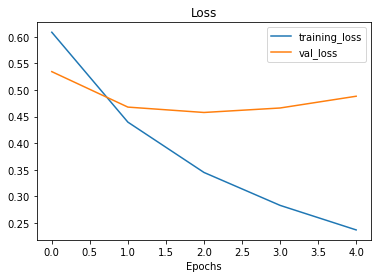

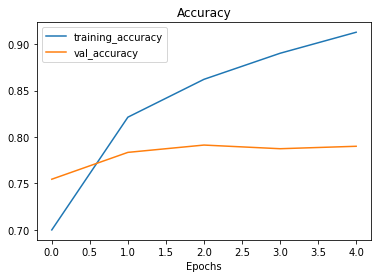

In [41]:
plot_loss_curves(history_1)

In [42]:
model_1_pred_prob = model_1.predict(val_data)
model_1_pred_prob[:10]

array([[0.25377542],
       [0.76115525],
       [0.9971333 ],
       [0.10056716],
       [0.10068658],
       [0.92522883],
       [0.9075671 ],
       [0.9924644 ],
       [0.9549676 ],
       [0.26366365]], dtype=float32)

In [43]:
model_1_pred = tf.squeeze(tf.round(model_1_pred_prob))
model_1_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [44]:
model_1_results = calculate_result(val_label , model_1_pred)
print(model_1_results)

{'Accuracy': 0.7900262467191601, 'Precision': 0.7986440245389494, 'Recall': 0.7900262467191601, 'F1 Score': 0.7859832179841351}


In [45]:
# Now let's check whether our model is predicting more precisely than base model or what
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [46]:
def comparator_function(baseline_results , new_model_results):
    for key , value in baseline_results.items():
        print(f'Baseline {key} : {value:.2f} , New {key} : {new_model_results[key]:.2f} , Difference : {new_model_results[key] - value:.2f}')

In [47]:
comparator_function(baseline_results , model_1_results)

Baseline Accuracy : 0.79 , New Accuracy : 0.79 , Difference : -0.00
Baseline Precision : 0.81 , New Precision : 0.80 , Difference : -0.01
Baseline Recall : 0.79 , New Recall : 0.79 , Difference : -0.00
Baseline F1 Score : 0.79 , New F1 Score : 0.79 , Difference : -0.00


In [48]:
words_in_vocab = text_vectorise.get_vocabulary()
len(words_in_vocab) , words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [49]:
model_1.summary()

Model: "Model_1_Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


## Model - 2(Using LSTM)

In [50]:
inputs = tf.keras.layers.Input(shape = (1 , ) , dtype = 'string')
x = text_vectorise(inputs)
x = embedding(x)
print(f'Shape after Embedding {x.shape}')

x = tf.keras.layers.LSTM(64)(x)
print(f'Shape after LSTM {x.shape}')

outputs = tf.keras.layers.Dense(1 , activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs , outputs , name = 'Model_2_LSTM')

Shape after Embedding (None, 15, 128)
Shape after LSTM (None, 64)


In [51]:
model_2.compile(loss = 'binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [52]:
model_2.summary()

Model: "Model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [53]:
history_2 = model_2.fit(train_data , train_label , epochs = 5 , validation_data = (val_data , val_label) , 
                       callbacks = [create_tensorboard_callback('NLP' , 'LSTM_Model')])

Saving TensorBoard log files to: NLP/LSTM_Model/20210707-121955
Epoch 1/5
215/215 [==============================] - 20s 73ms/step - loss: 0.2190 - accuracy: 0.9175 - val_loss: 0.5488 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 11s 50ms/step - loss: 0.1561 - accuracy: 0.9416 - val_loss: 0.6581 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 11s 50ms/step - loss: 0.1292 - accuracy: 0.9508 - val_loss: 0.7076 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 11s 49ms/step - loss: 0.1041 - accuracy: 0.9604 - val_loss: 0.7767 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 11s 50ms/step - loss: 0.0841 - accuracy: 0.9675 - val_loss: 0.9601 - val_accuracy: 0.7703


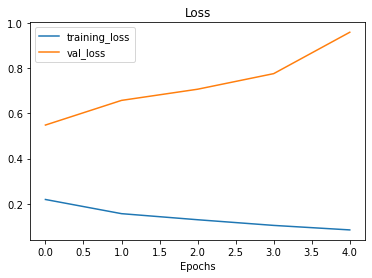

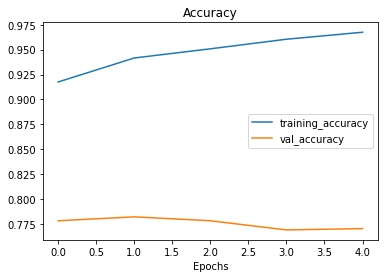

In [54]:
plot_loss_curves(history_2)

In [55]:
model_2_pred_prob = model_2.predict(val_data)
model_2_pred_prob[:10]

array([[9.7311288e-02],
       [8.3769894e-01],
       [9.9971426e-01],
       [3.6389351e-02],
       [4.2909384e-04],
       [9.9867904e-01],
       [7.9086322e-01],
       [9.9983680e-01],
       [9.9972665e-01],
       [4.0880474e-01]], dtype=float32)

In [56]:
model_2_pred = tf.squeeze(tf.round(model_2_pred_prob))
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [57]:
model_2_results = calculate_result(val_label , model_2_pred)
print(model_2_results)

{'Accuracy': 0.7703412073490814, 'Precision': 0.7709806133638261, 'Recall': 0.7703412073490814, 'F1 Score': 0.7688058109983439}


In [58]:
comparator_function(baseline_results , model_2_results)

Baseline Accuracy : 0.79 , New Accuracy : 0.77 , Difference : -0.02
Baseline Precision : 0.81 , New Precision : 0.77 , Difference : -0.04
Baseline Recall : 0.79 , New Recall : 0.77 , Difference : -0.02
Baseline F1 Score : 0.79 , New F1 Score : 0.77 , Difference : -0.02


## Model - 3 (Using GRU)

In [59]:
inputs = tf.keras.layers.Input(shape = (1 , ) , dtype = 'string')
x = text_vectorise(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(64)(x)
outputs = tf.keras.layers.Dense(1 , activation = 'sigmoid')(x)

model_3 = tf.keras.Model(inputs , outputs , name = 'Model_3_GRU')

In [60]:
model_3.compile(loss = 'binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [61]:
model_3.summary()

Model: "Model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [62]:
history_3 = model_3.fit(train_data , train_label , epochs = 5 , validation_data = (val_data , val_label) , 
                       callbacks = [create_tensorboard_callback('NLP' , 'GRU_Model')])

Saving TensorBoard log files to: NLP/GRU_Model/20210707-122141
Epoch 1/5
215/215 [==============================] - 26s 84ms/step - loss: 0.1492 - accuracy: 0.9434 - val_loss: 0.7095 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 11s 50ms/step - loss: 0.0840 - accuracy: 0.9693 - val_loss: 0.8825 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 11s 50ms/step - loss: 0.0742 - accuracy: 0.9714 - val_loss: 0.9733 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 11s 50ms/step - loss: 0.0612 - accuracy: 0.9772 - val_loss: 1.0322 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 11s 50ms/step - loss: 0.0532 - accuracy: 0.9766 - val_loss: 1.1124 - val_accuracy: 0.7638


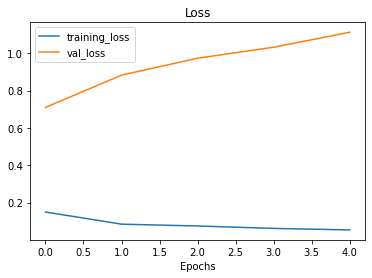

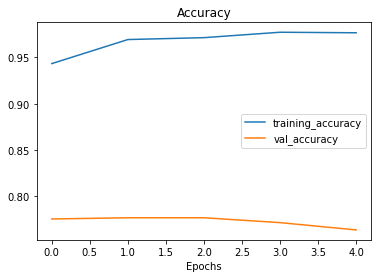

In [63]:
plot_loss_curves(history_3)

In [64]:
model_3_pred_prob = model_3.predict(val_data)
model_3_pred_prob[:10]

array([[6.91184402e-03],
       [7.38484740e-01],
       [9.99743164e-01],
       [1.25324875e-01],
       [1.18842654e-04],
       [9.99477923e-01],
       [4.99998152e-01],
       [9.99927759e-01],
       [9.99814212e-01],
       [8.11708033e-01]], dtype=float32)

In [65]:
model_3_pred = tf.squeeze(tf.round(model_3_pred_prob))
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [66]:
model_3_results = calculate_result(val_label , model_3_pred)
print(model_3_results)

{'Accuracy': 0.7637795275590551, 'Precision': 0.7639261289761722, 'Recall': 0.7637795275590551, 'F1 Score': 0.7624822674694383}


In [67]:
comparator_function(baseline_results , model_3_results)

Baseline Accuracy : 0.79 , New Accuracy : 0.76 , Difference : -0.03
Baseline Precision : 0.81 , New Precision : 0.76 , Difference : -0.05
Baseline Recall : 0.79 , New Recall : 0.76 , Difference : -0.03
Baseline F1 Score : 0.79 , New F1 Score : 0.76 , Difference : -0.02


## Model - 4 (Using Bidirectional RNN)

In [68]:
inputs = tf.keras.layers.Input(shape = (1 , ) , dtype = 'string')
x = text_vectorise(inputs)
x = embedding(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(1 , activation = 'sigmoid')(x)

model_4 = tf.keras.Model(inputs , outputs , name = 'Model_4_Bidirectional_RNN')

In [69]:
model_4.compile(loss = 'binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [70]:
history_4 = model_4.fit(train_data , train_label , epochs = 5 , validation_data = (val_data , val_label) , 
                       callbacks = [create_tensorboard_callback('NLP' , 'Bidirectional_LSTM_Model')])

Saving TensorBoard log files to: NLP/Bidirectional_LSTM_Model/20210707-122254
Epoch 1/5
215/215 [==============================] - 27s 90ms/step - loss: 0.1075 - accuracy: 0.9702 - val_loss: 1.0018 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 7s 35ms/step - loss: 0.0543 - accuracy: 0.9766 - val_loss: 1.2040 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 10s 44ms/step - loss: 0.0483 - accuracy: 0.9772 - val_loss: 1.2213 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 11s 51ms/step - loss: 0.0445 - accuracy: 0.9791 - val_loss: 1.4877 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 11s 51ms/step - loss: 0.0381 - accuracy: 0.9823 - val_loss: 1.5805 - val_accuracy: 0.7638


In [71]:
model_4.summary()

Model: "Model_4_Bidirectional_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


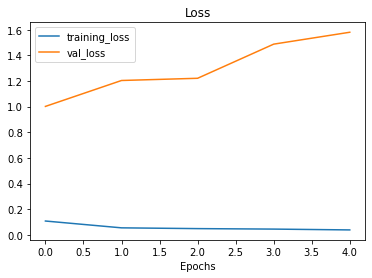

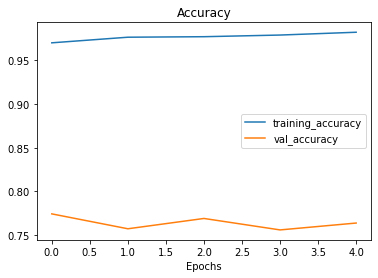

In [72]:
plot_loss_curves(history_4)

In [73]:
model_4_pred_prob = model_4.predict(val_data)
model_4_pred_prob[:10]

array([[1.3931692e-03],
       [5.8133841e-01],
       [9.9997574e-01],
       [2.8942880e-01],
       [8.9698287e-06],
       [9.9984497e-01],
       [1.4369118e-01],
       [9.9999392e-01],
       [9.9998188e-01],
       [9.9909496e-01]], dtype=float32)

In [74]:
model_4_pred = tf.squeeze(tf.round(model_4_pred_prob))
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [75]:
model_4_results = calculate_result(val_label , model_4_pred)
print(model_4_results)

{'Accuracy': 0.7637795275590551, 'Precision': 0.7649838845988884, 'Recall': 0.7637795275590551, 'F1 Score': 0.761768588939328}


In [76]:
comparator_function(baseline_results , model_4_results)

Baseline Accuracy : 0.79 , New Accuracy : 0.76 , Difference : -0.03
Baseline Precision : 0.81 , New Precision : 0.76 , Difference : -0.05
Baseline Recall : 0.79 , New Recall : 0.76 , Difference : -0.03
Baseline F1 Score : 0.79 , New F1 Score : 0.76 , Difference : -0.02


## Model - 5 (Using CNN)

In [77]:
inputs = tf.keras.layers.Input(shape = (1 , ) , dtype = 'string')
x = text_vectorise(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(filters = 32 , kernel_size = 5 , activation = 'relu')(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(1 , activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs , outputs , name = 'Model_5_Cnv1D')

model_5.compile(loss = 'binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

model_5.summary()

Model: "Model_5_Cnv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 11, 32)            20512     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,300,545
Trainable params: 1,300,545
Non-trainable params: 0
___________________________________________

In [78]:
history_5 = model_5.fit(train_data , train_label , epochs = 5 , validation_data = (val_data , val_label) , 
                       callbacks = [create_tensorboard_callback('NLP' , 'Model_5_Conv1D')])

Saving TensorBoard log files to: NLP/Model_5_Conv1D/20210707-122404
Epoch 1/5
215/215 [==============================] - 12s 49ms/step - loss: 0.1365 - accuracy: 0.9585 - val_loss: 0.8511 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0756 - accuracy: 0.9723 - val_loss: 0.9954 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0605 - accuracy: 0.9759 - val_loss: 1.1308 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0557 - accuracy: 0.9769 - val_loss: 1.2031 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0503 - accuracy: 0.9793 - val_loss: 1.2021 - val_accuracy: 0.7533


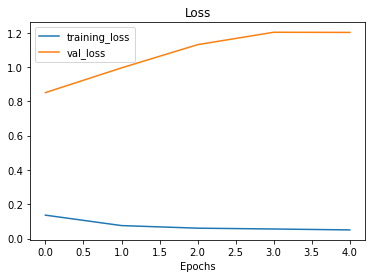

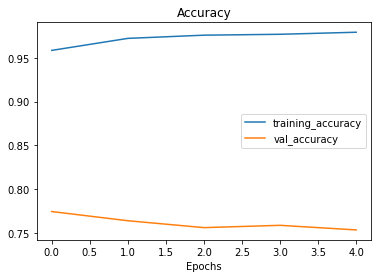

In [79]:
plot_loss_curves(history_5)

In [80]:
model_5_pred_prob = model_5.predict(val_data)
model_5_pred_prob[:10]

array([[1.5232134e-01],
       [7.5389886e-01],
       [9.9982005e-01],
       [7.0049524e-02],
       [8.5470631e-08],
       [9.9610251e-01],
       [9.9051523e-01],
       [9.9997294e-01],
       [9.9999940e-01],
       [9.3717408e-01]], dtype=float32)

In [81]:
model_5_pred = tf.squeeze(tf.round(model_5_pred_prob))
model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [82]:
model_5_results = calculate_result(val_label , model_5_pred)
print(model_5_results)

{'Accuracy': 0.7532808398950132, 'Precision': 0.752883120923556, 'Recall': 0.7532808398950132, 'F1 Score': 0.7524471022550004}


In [83]:
comparator_function(baseline_results , model_5_results)

Baseline Accuracy : 0.79 , New Accuracy : 0.75 , Difference : -0.04
Baseline Precision : 0.81 , New Precision : 0.75 , Difference : -0.06
Baseline Recall : 0.79 , New Recall : 0.75 , Difference : -0.04
Baseline F1 Score : 0.79 , New F1 Score : 0.75 , Difference : -0.03


## Model - 6 (Using Pretrained Embedding)

In [84]:
import tensorflow_hub as hub

In [85]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")
embed_samples = embed(["When you call the universal sentence encoder on a sentence, it turns it into numbers."])

# This embeded layer makes shape of input in (512 , )
print(embed_samples[0])

tf.Tensor(
[-0.0123927   0.03531608 -0.01099579  0.03277723 -0.00322147 -0.00548057
  0.02194436  0.00097765 -0.06762277  0.02309461  0.04821928 -0.00733266
 -0.02917932 -0.05648516  0.00602341  0.01549809 -0.01048699 -0.02966837
 -0.00156175 -0.02509197  0.0314161   0.03668106  0.0108462  -0.01418025
  0.00464824 -0.02344348 -0.00020681 -0.02815114  0.0449666   0.06649816
 -0.05020558  0.03961545  0.03515069  0.05097985 -0.00656219 -0.03058298
 -0.06412389 -0.01427408 -0.04210231 -0.01468411  0.01882669 -0.05180962
  0.06604099  0.00261965  0.06654275 -0.01172857  0.04682045 -0.00521338
 -0.00678892 -0.00198042 -0.03923661 -0.01936459 -0.00104519 -0.05074507
 -0.00179133 -0.00167213 -0.0612305   0.08763769 -0.03494092 -0.01202764
  0.01141352 -0.02393308 -0.06533754 -0.01329195  0.00926038  0.00476144
 -0.07817001 -0.0937283   0.0166667   0.04917971  0.06818111 -0.01122517
  0.02474338 -0.00606533  0.03342634 -0.06347604 -0.01943606 -0.03990305
  0.06308019  0.07469687  0.03577558  0.

In [86]:
sentence_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-large/5" , 
                                 input_shape = [] , dtype = tf.string , trainable = False , name = 'USE')

In [87]:
# USE is Using pretrained Sentence Encoder
model_6 = tf.keras.Sequential([
    sentence_encoder , 
    tf.keras.layers.Dense(64 , activation = 'relu') , 
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
] , name = 'Model_6_USE')

model_6.compile(loss = 'binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

model_6.summary()

Model: "Model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               147354880 
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 147,387,777
Trainable params: 32,897
Non-trainable params: 147,354,880
_________________________________________________________________


In [88]:
history_6 = model_6.fit(train_data , train_label , epochs = 5 , validation_data = (val_data , val_label) , 
                       callbacks = [create_tensorboard_callback('NLP' , 'Model_5_USE')])

Saving TensorBoard log files to: NLP/Model_5_USE/20210707-122840
Epoch 1/5
215/215 [==============================] - 350s 1s/step - loss: 0.5043 - accuracy: 0.7859 - val_loss: 0.4266 - val_accuracy: 0.8215
Epoch 2/5
215/215 [==============================] - 110s 509ms/step - loss: 0.4002 - accuracy: 0.8270 - val_loss: 0.4179 - val_accuracy: 0.8176
Epoch 3/5
215/215 [==============================] - 106s 494ms/step - loss: 0.3827 - accuracy: 0.8343 - val_loss: 0.4152 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 108s 501ms/step - loss: 0.3729 - accuracy: 0.8364 - val_loss: 0.4149 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 107s 496ms/step - loss: 0.3642 - accuracy: 0.8421 - val_loss: 0.4160 - val_accuracy: 0.8202


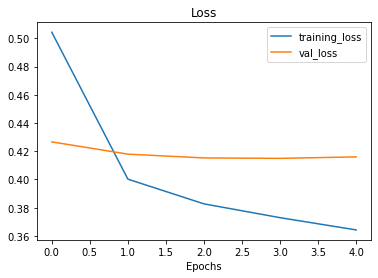

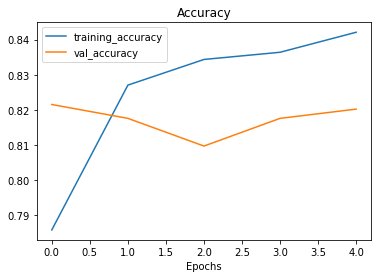

In [89]:
plot_loss_curves(history_6)

In [90]:
model_6_pred_prob = model_6.predict(val_data)
model_6_pred_prob[:10]

array([[0.26349106],
       [0.7396594 ],
       [0.9934038 ],
       [0.14166772],
       [0.7150407 ],
       [0.73446494],
       [0.9912586 ],
       [0.97216344],
       [0.98238313],
       [0.14294809]], dtype=float32)

In [91]:
model_6_pred = tf.squeeze(tf.round(model_6_pred_prob))
model_6_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [92]:
model_6_results = calculate_result(val_label , model_6_pred)
print(model_6_results)

{'Accuracy': 0.8202099737532809, 'Precision': 0.8215235049766086, 'Recall': 0.8202099737532809, 'F1 Score': 0.8190958260772078}


In [93]:
comparator_function(baseline_results , model_6_results)

Baseline Accuracy : 0.79 , New Accuracy : 0.82 , Difference : 0.03
Baseline Precision : 0.81 , New Precision : 0.82 , Difference : 0.01
Baseline Recall : 0.79 , New Recall : 0.82 , Difference : 0.03
Baseline F1 Score : 0.79 , New F1 Score : 0.82 , Difference : 0.03


## Model - 7 (On 10% of data)

In [94]:
train_data_90_precent , train_data_10_percent , train_label_90_percent , train_label_10_percent = train_test_split(np.array(train_data) , 
                                                                                                                 train_label , 
                                                                                                                 test_size = 0.1 , 
                                                                                                                 random_state = 42)

In [95]:
print(f'Total Train Data : {len(train_data)}')
print(f'10% Train Data : {len(train_data_10_percent)}')

Total Train Data : 6851
10% Train Data : 686


In [96]:
pd.Series(train_label_10_percent).value_counts()

0    415
1    271
dtype: int64

In [97]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss = 'binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

model_7.summary()

Model: "Model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               147354880 
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 147,387,777
Trainable params: 32,897
Non-trainable params: 147,354,880
_________________________________________________________________


In [98]:
history_7 = model_7.fit(train_data_10_percent , train_label_10_percent , epochs = 5 , validation_data = (val_data , val_label) ,
                       callbacks = [create_tensorboard_callback('NLP' , 'Model_7_10%_data')])

Saving TensorBoard log files to: NLP/Model_7_10%_data/20210707-124336
Epoch 1/5
22/22 [==============================] - 264s 10s/step - loss: 0.6703 - accuracy: 0.7143 - val_loss: 0.6440 - val_accuracy: 0.7493
Epoch 2/5
22/22 [==============================] - 29s 1s/step - loss: 0.5976 - accuracy: 0.8338 - val_loss: 0.5843 - val_accuracy: 0.7822
Epoch 3/5
22/22 [==============================] - 30s 1s/step - loss: 0.5209 - accuracy: 0.8469 - val_loss: 0.5259 - val_accuracy: 0.7861
Epoch 4/5
22/22 [==============================] - 29s 1s/step - loss: 0.4526 - accuracy: 0.8542 - val_loss: 0.4834 - val_accuracy: 0.7966
Epoch 5/5
22/22 [==============================] - 29s 1s/step - loss: 0.4043 - accuracy: 0.8644 - val_loss: 0.4631 - val_accuracy: 0.8045


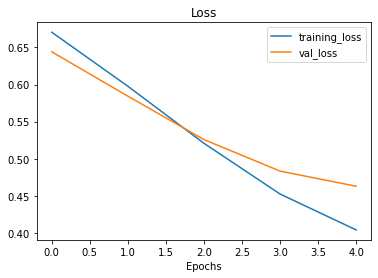

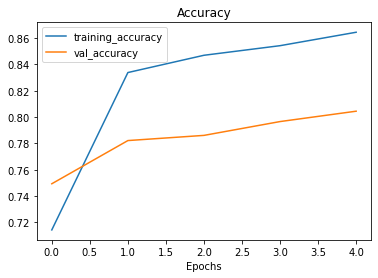

In [99]:
plot_loss_curves(history_7)

In [100]:
model_7_pred_prob = model_7.predict(val_data)
model_7_pred_prob[:10]

array([[0.18344316],
       [0.6125131 ],
       [0.8902035 ],
       [0.20702541],
       [0.53495395],
       [0.7817645 ],
       [0.87579834],
       [0.75686944],
       [0.89692676],
       [0.23162362]], dtype=float32)

In [101]:
model_7_pred = tf.squeeze(tf.round(model_7_pred_prob))
model_7_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [102]:
model_7_results = calculate_result(val_label , model_7_pred)
print(model_7_results)

{'Accuracy': 0.8044619422572179, 'Precision': 0.8103605470368835, 'Recall': 0.8044619422572179, 'F1 Score': 0.8016443370400904}


In [103]:
comparator_function(baseline_results , model_7_results)

Baseline Accuracy : 0.79 , New Accuracy : 0.80 , Difference : 0.01
Baseline Precision : 0.81 , New Precision : 0.81 , Difference : -0.00
Baseline Recall : 0.79 , New Recall : 0.80 , Difference : 0.01
Baseline F1 Score : 0.79 , New F1 Score : 0.80 , Difference : 0.02


## All model results

In [104]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,Accuracy,Precision,Recall,F1 Score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.790026,0.798644,0.790026,0.785983
lstm,0.770341,0.770981,0.770341,0.768806
gru,0.763780,0.763926,0.763780,0.762482
bidirectional,0.763780,0.764984,0.763780,0.761769
conv1d,0.753281,0.752883,0.753281,0.752447
tf_hub_sentence_encoder,0.820210,0.821524,0.820210,0.819096
tf_hub_10_percent_data,0.804462,0.810361,0.804462,0.801644


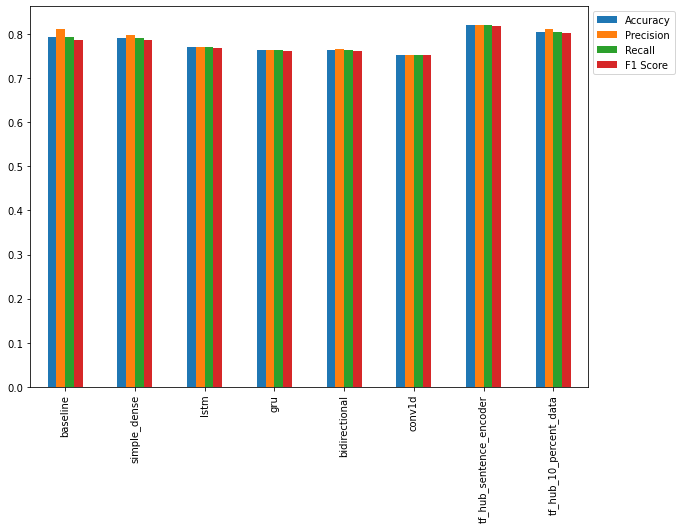

In [105]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

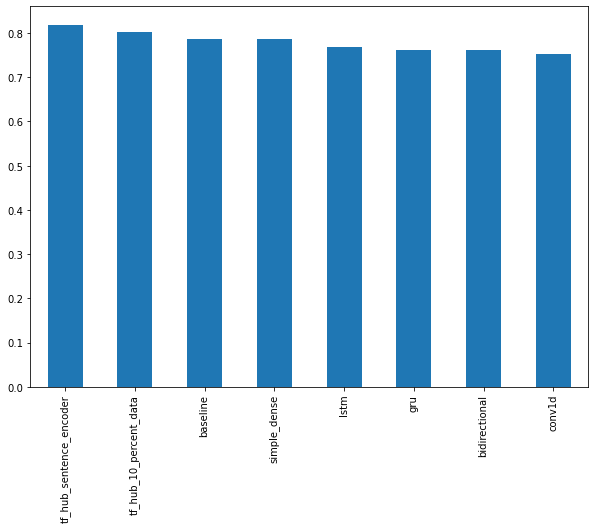

In [106]:
# Sort model results by f1-score
all_model_results.sort_values("F1 Score", ascending=False)["F1 Score"].plot(kind="bar", figsize=(10, 7));

## Combining Model(Model Ensembling/stacking)

In [107]:
baseline_preds = np.max(model_0.predict_proba(val_data) , axis = 1)
combined_pred_probs = baseline_preds + tf.squeeze(model_2_pred_prob) + tf.squeeze(model_6_pred_prob)

In [108]:
print(combined_pred_probs[:10])

tf.Tensor(
[0.9158778  2.279015   2.8595781  0.95817053 1.3473759  2.554807
 2.3580441  2.8753586  2.713324   1.3735104 ], shape=(10,), dtype=float32)


In [112]:
combined_preds = tf.round(combined_pred_probs/3)
print(combined_preds[:20])

tf.Tensor([0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.], shape=(20,), dtype=float32)


In [113]:
ensemble_results = calculate_result(val_label , combined_preds)
print(ensemble_results)

{'Accuracy': 0.7939632545931758, 'Precision': 0.7939180808190444, 'Recall': 0.7939632545931758, 'F1 Score': 0.7939392949608854}


In [114]:
comparator_function(baseline_results , ensemble_results)

Baseline Accuracy : 0.79 , New Accuracy : 0.79 , Difference : 0.00
Baseline Precision : 0.81 , New Precision : 0.79 , Difference : -0.02
Baseline Recall : 0.79 , New Recall : 0.79 , Difference : 0.00
Baseline F1 Score : 0.79 , New F1 Score : 0.79 , Difference : 0.01


In [115]:
# Add model result to all model results
all_model_results.loc['ensemble_results'] = ensemble_results

In [116]:
all_model_results

,Accuracy,Precision,Recall,F1 Score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.790026,0.798644,0.790026,0.785983
lstm,0.770341,0.770981,0.770341,0.768806
gru,0.763780,0.763926,0.763780,0.762482
bidirectional,0.763780,0.764984,0.763780,0.761769
conv1d,0.753281,0.752883,0.753281,0.752447
tf_hub_sentence_encoder,0.820210,0.821524,0.820210,0.819096
tf_hub_10_percent_data,0.804462,0.810361,0.804462,0.801644
ensemble_results,0.793963,0.793918,0.793963,0.793939


## Most wrong Prediction

In [117]:
val_df = pd.DataFrame({'text' : val_data , 'target' : val_label , 
                       'pred' : model_6_pred , 'pred_prob' : tf.squeeze(model_6_pred_prob)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.263491
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.739659
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.993404
3,@camilacabello97 Internally and externally scr...,1,0.0,0.141668
4,Radiation emergency #preparedness starts with ...,1,1.0,0.715041


In [118]:
most_wrong = val_df[ val_df['target'] != val_df['pred']].sort_values('pred_prob' , ascending = False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.942066
619,Emergency Response and Hazardous Chemical Mana...,0,1.0,0.933560
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.908095
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.890591
11,The Five Fatal Flaws in the Iran Deal https://...,0,1.0,0.880511
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.864481
317,Photo: postapocalypticflimflam: Prodding aroun...,0,1.0,0.832617
718,Haley Lu Richardson Fights for Water in The La...,0,1.0,0.824460
759,FedEx will no longer transport bioterror patho...,0,1.0,0.803175
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.789169


In [119]:
print(len(most_wrong) , len(val_label))

137 762


In [120]:
for row in most_wrong[:10].itertuples():
    _ , text , target , pred , prob = row
    print(f'Target: {target} , Prediction: {pred} , Probability: {prob}')
    print(f'Text: {text}')
    print('-------\n')

Target: 0 , Prediction: 1.0 , Probability: 0.9420658349990845
Text: ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying
-------

Target: 0 , Prediction: 1.0 , Probability: 0.933559775352478
Text: Emergency Response and Hazardous Chemical Management: Principles and Practices http://t.co/4sSuyhkgRB http://t.co/TDerBtgZ2k
-------

Target: 0 , Prediction: 1.0 , Probability: 0.9080947637557983
Text: @madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods
-------

Target: 0 , Prediction: 1.0 , Probability: 0.8905909061431885
Text: Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm   http://t.co/6GLDwx71DA
-------

Target: 0 , Prediction: 1.0 , Probability: 0.8805114030838013
Text: The Five Fatal Flaws in the Iran Deal https://t.co/ztfEAd8GId via @YouTube
-------

Target: 0 , Prediction: 1.0 , Probability: 0.8644809722900391
Text: Air Group is here to the rescue! We ha

In [121]:
for row in most_wrong[-10:].itertuples():
    _ , text , target , pred , prob = row
    print(f'Target: {target} , Prediction: {pred} , Probability: {prob}')
    print(f'Text: {text}')
    print('-------\n')

Target: 1 , Prediction: 0.0 , Probability: 0.05893748998641968
Text: I Will Survive by Gloria Gaynor (with Oktaviana Devi) ÛÓ https://t.co/HUkJZ1wT36
-------

Target: 1 , Prediction: 0.0 , Probability: 0.05845153331756592
Text: I get to smoke my shit in peace
-------

Target: 1 , Prediction: 0.0 , Probability: 0.053624123334884644
Text: @SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren
-------

Target: 1 , Prediction: 0.0 , Probability: 0.051804184913635254
Text: VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK
-------

Target: 1 , Prediction: 0.0 , Probability: 0.049308210611343384
Text: #download &amp; #watch Demolition Frog (2002) http://t.co/81nEizeknm #movie
-------

Target: 1 , Prediction: 0.0 , Probability: 0.04870036244392395
Text: Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube
-------

Target: 1 , Prediction: 0.0 , Probability: 0.045468270778656006
Text: 

## Predictions on Test Dataset

In [122]:
test_sentences = test['text'].to_list()
test_samples = random.sample(test_sentences , 10)

for i in test_samples:
    pred_prob = tf.squeeze(model_6.predict([i]))
    pred = tf.round(pred_prob)
    print(f'Prediction: {int(pred)} , Probability: {pred_prob}')
    print(f'Text: {i}')
    print('------\n')

Prediction: 1 , Probability: 0.9216587543487549
Text: We dont really talk about the murder of the bombing campaigns in WWII because we won but murder it is. https://t.co/jsGwnY6kdJ
------

Prediction: 1 , Probability: 0.9884679913520813
Text: Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/9i6CrCRq2m
------

Prediction: 1 , Probability: 0.956251859664917
Text: Twister hits 4 villages in Quezon province - http://t.co/ehJv0gvo47 http://t.co/pzJcRNrBSr #Quezon #news
------

Prediction: 0 , Probability: 0.23046258091926575
Text: #AskConnor there's a zombie apocalypse. the item to your right is your weapon. you're either screwed or you're gonna live.
------

Prediction: 1 , Probability: 0.9979360699653625
Text: Sinjar Massacre Yazidis Blast Lack of Action Over Hostages http://t.co/fdU8aCnC2W #denver #billings #rapidcity #seattle #cheyenne #lasvegas
------

Prediction: 1 , Probability: 0.7865294218063354
Text: SPD 

## The speed/score tradeoff

In [123]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
    start_time = time.perf_counter() # get start time
    model.predict(samples) # make predictions
    end_time = time.perf_counter() # get finish time
    total_time = end_time-start_time # calculate how long predictions took to make
    time_per_pred = total_time/len(samples) # find prediction time per sample
    return total_time, time_per_pred

In [124]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_data)
model_6_total_pred_time, model_6_time_per_pred

(13.960657999999967, 0.018321073490813605)

In [125]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_data)
baseline_total_pred_time, baseline_time_per_pred

(0.061952000000019325, 8.130183727036656e-05)

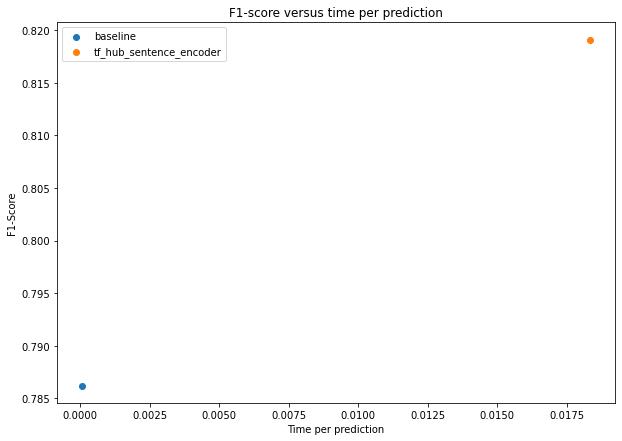

In [126]:
# Neural network is slow compared to Naive Bayes
plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["F1 Score"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["F1 Score"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");